In [2]:
import qctoolkit as qtk
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

/home/samio/local/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
mol_base = qtk.Molecule()
mol_base.build([[7, 0, 0, 0], [7, 1.2, 0, 0]])

N2

In [4]:
with open('ccpvdz_ne_gbasis.txt') as f:
    ne_basis = f.readlines()
    
qmsetting = {
    'program': 'gaussian',
    #'basis_set': ar_basis, gaussian failed too many simple basis function?
    'basis_set': ne_basis,
    'theory': 'pbe',
    'threads': 1,
}

In [6]:
inp = qtk.QMInp(mol_base, **qmsetting)
inp.run()

QMInp.run: running job with command: g09 N2.com

QMRun: formchk N2.chk 
sp shell or spherical basis are used, some functions will not work, use as_horton interface insdtead
something wrong while loading fchk file with error message: qctoolkit.QM.gaussianbasis_io: basis extraction failed at{'index': 13, 'center': array([0., 0., 0.]), 'atom': 'N', 'type': 'D0', 'exponents': [2.202], 'coefficients': [1.0]}


-109.1364122

In [392]:
delta = 0.001
mols = []
inps = []
steps = 7


for dZ in range(steps):
    mol = mol_base.copy()
    mol.setAtoms(0, Z=mol.Z[0] + dZ)
    mol.setAtoms(1, Z=mol.Z[1] - dZ)
    mol.name = "dZ_%d_%s" % (dZ, mol.stoichiometry())
    new_Z = mol.Z
    mols.append(mol)
    inps.append(qtk.QMInp(mol, nuclear_charges=new_Z, **qmsetting))
    
for dZ in range(steps):
    mol = mol_base.copy()
    mol.setAtoms(0, Z=mol.Z[0] + dZ)
    mol.setAtoms(1, Z=mol.Z[1] - dZ)
    new_Z = [mol.Z[0] + delta, mol.Z[1] - delta]
    mol.name = "dZ_%dp_%s" % (dZ, mol.stoichiometry())
    mols.append(mol)
    inps.append(qtk.QMInp(mol, nuclear_charges=new_Z, **qmsetting))
    
for dZ in range(steps):
    mol = mol_base.copy()
    mol.setAtoms(0, Z=mol.Z[0] + dZ)
    mol.setAtoms(1, Z=mol.Z[1] - dZ)
    new_Z = [mol.Z[0] - delta, mol.Z[1] + delta]
    mol.name = "dZ_%dm_%s" % (dZ, mol.stoichiometry())
    mols.append(mol)
    inps.append(qtk.QMInp(mol, nuclear_charges=new_Z, **qmsetting))

In [216]:
qtk.qmRunAll(inps, 'N2_1D_scan')

qmRunJob: runing qmjob:'dZ_0_N2: gaussian' with name: dZ_0_N2 
QMInp.run: running job with command: g09 dZ_0_N2.com
qmRunJob: runing qmjob:'dZ_1_CO: gaussian' with name: dZ_1_CO 
qmRunJob: runing qmjob:'dZ_2_BF: gaussian' with name: dZ_2_BF 
qmRunJob: runing qmjob:'dZ_3_BeNe: gaussian' with name: dZ_3_BeNe 
QMInp.run: running job with command: g09 dZ_1_CO.com



QMInp.run: running job with command: g09 dZ_2_BF.com
QMInp.run: running job with command: g09 dZ_3_BeNe.com

QMRun: formchk dZ_0_N2.chk 
sp shell or spherical basis are used, some functions will not work, use as_horton interface insdtead
something wrong while loading fchk file with error message: qctoolkit.QM.gaussianbasis_io: basis extraction failed at{'index': 13, 'center': array([0., 0., 0.]), 'atom': 'N', 'type': 'D0', 'exponents': [2.202], 'coefficients': [1.0]}
qmRunJob: runing qmjob:'dZ_4_LiNa: gaussian' with name: dZ_4_LiNa 
QMInp.run: running job with command: g09 dZ_4_LiNa.com

QMRun: formchk dZ_2_BF.chk 
sp shell or 

qmRunJob: runing qmjob:'dZ_3m_BeNe: gaussian' with name: dZ_3m_BeNe 
QMInp.run: running job with command: g09 dZ_3m_BeNe.com

QMRun: formchk dZ_2m_BF.chk 
sp shell or spherical basis are used, some functions will not work, use as_horton interface insdtead
something wrong while loading fchk file with error message: qctoolkit.QM.gaussianbasis_io: basis extraction failed at{'index': 13, 'center': array([0., 0., 0.]), 'atom': 'F', 'type': 'D0', 'exponents': [2.202], 'coefficients': [1.0]}
qmRunJob: runing qmjob:'dZ_4m_LiNa: gaussian' with name: dZ_4m_LiNa 
QMInp.run: running job with command: g09 dZ_4m_LiNa.com

QMRun: formchk dZ_6p_HAl.chk 
sp shell or spherical basis are used, some functions will not work, use as_horton interface insdtead
something wrong while loading fchk file with error message: qctoolkit.QM.gaussianbasis_io: basis extraction failed at{'index': 13, 'center': array([0., 0., 0.]), 'atom': 'Al', 'type': 'D0', 'exponents': [2.202], 'coefficients': [1.0]}
qmRunJob: runing q

In [6]:
refs = [[], [], []]
root = 'N2_1D_scan_p01'
delta = 0.01

In [285]:
for f in sorted(glob('%s/dZ_[0-9]p_*/*.out' % root)):
    out = qtk.QMOut(f, program='gaussian')
    #ref[0].append(out.as_horton())
    refs[0].append(out)

for f in sorted(glob('%s/dZ_[0-9]_*/*.out' % root)):
    out = qtk.QMOut(f, program='gaussian')
    #ref[1].append(out.as_horton())
    refs[1].append(out)
    
for f in sorted(glob('%s/dZ_[0-9]m_*/*.out' % root)):
    out = qtk.QMOut(f, program='gaussian')
    #ref[2].append(out.as_horton())
    refs[2].append(out)

sp shell or spherical basis are used, some functions will not work, use as_horton interface insdtead
something wrong while loading fchk file with error message: qctoolkit.QM.gaussianbasis_io: basis extraction failed at{'index': 13, 'center': array([0., 0., 0.]), 'atom': 'N', 'type': 'D0', 'exponents': [2.202], 'coefficients': [1.0]}
sp shell or spherical basis are used, some functions will not work, use as_horton interface insdtead
something wrong while loading fchk file with error message: qctoolkit.QM.gaussianbasis_io: basis extraction failed at{'index': 13, 'center': array([0., 0., 0.]), 'atom': 'O', 'type': 'D0', 'exponents': [2.202], 'coefficients': [1.0]}
sp shell or spherical basis are used, some functions will not work, use as_horton interface insdtead
something wrong while loading fchk file with error message: qctoolkit.QM.gaussianbasis_io: basis extraction failed at{'index': 13, 'center': array([0., 0., 0.]), 'atom': 'F', 'type': 'D0', 'exponents': [2.202], 'coefficients': [1

In [8]:
qtk.setting.quiet = True

def horton_check(out):
    print "processing %s" % out.name
    Et = out.Et
    hinp = out.as_horton()
    hinp.settting['scf_step'] = 10
    try:
        hinp.run()
    except:
        hinp.Et = np.nan
    return Et - hinp.Et

for f in sorted(glob('%s/dZ_[0-9]p_*/*.out' % root)):
    out = qtk.QMOut(f, program='gaussian')
    dE = horton_check(out)
    if abs(dE) > 1E-3:
        print out.name, dE

for f in sorted(glob('%s/dZ_[0-9]_*/*.out' % root)):
    out = qtk.QMOut(f, program='gaussian')
    dE = horton_check(out)
    if abs(dE) > 1E-3:
        print out.name, dE
    
for f in sorted(glob('%s/dZ_[0-9]m_*/*.out' % root)):
    out = qtk.QMOut(f, program='gaussian')
    dE = horton_check(out)
    if abs(dE) > 1E-3:
        print out.name, dE
qtk.setting.quiet = False

processing dZ_0p_N2.out


AttributeError: 'inp' object has no attribute 'settting'

In [286]:
refs[0][0]

-109.1367873

In [287]:
refs[2][0]

-109.1367873

In [288]:
for out in refs[1]:
    print out.name

dZ_0_N2.out
dZ_1_CO.out
dZ_2_BF.out
dZ_3_BeNe.out
dZ_4_LiNa.out
dZ_5_HeMg.out
dZ_6_HAl.out


In [289]:
dE1 = []
dE2 = []
for i in range(steps):
    dE1.append((refs[0][i].Et - refs[2][i].Et) / (2 * delta))
    dE2.append((refs[0][i].Et + refs[2][i].Et - 2 * refs[1][i].Et) / ((delta) ** 2))

In [290]:
for ref in refs:
    print ref

[-109.1367873, -112.9569032, -124.1908296, -142.7451654, -168.6216887, -201.6530424, -241.7184696]
[-109.1364122, -112.8817334, -124.0425199, -142.5220159, -168.3277543, -201.2873871, -241.1728272]
[-109.1367873, -112.807307, -123.8949261, -142.2995739, -168.0345394, -200.9224306, -240.7419112]


In [393]:
print dE1
print dE2

[0.0, -7.479810000000242, -14.795174999999716, -22.279574999998886, -29.35746499999965, -36.53058999999956, -48.82791999999938]
[-7.501999999988129, -7.433999999761909, -7.158999999887783, -7.074999999758802, -7.195000000024265, -6.988000000092143, -1147.26399999995]


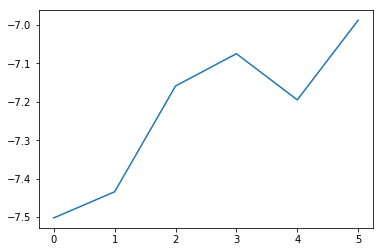

In [395]:
plt.plot(dE2[:-1])

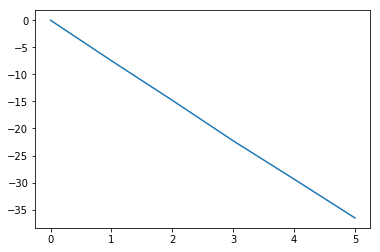

In [398]:
plt.plot(dE1[:-1])

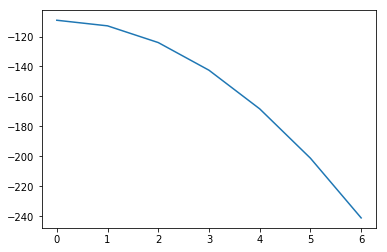

In [292]:
plt.plot([refs[1][i] for i in range(steps)])

In [293]:
def next_prd(i, di=1):
    ref = refs[1][i]
    tar = refs[1][i + di]
    E1 = ref.Et + dE1[i] * di
    E2 = E1 + dE2[i] / 2
    return tar.Et - E1, tar.Et - E2

-3.7453212 0.00567879999406
-3.6809765 0.0360234998812
-3.684321 -0.104821000056
-3.5261634 0.0113365998783
-3.6021678 -0.0046677999882
-3.3548501 0.139149900046
[0.005678799994058181, 0.03602349988119613, -0.10482100005640405, 0.011336599878291054, -0.004667799988197885, 0.13914990004562355]


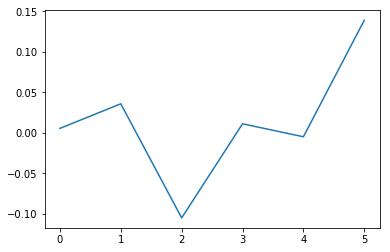

In [294]:
err_forward = []
for i in range(steps - 1):
    e1, e2 = next_prd(i)
    err_forward.append(e2)
    print e1, e2
print err_forward
plt.plot(err_forward)

-3.7344888 -0.0174888001193
-3.6343885 -0.0548885000558
-3.800079 -0.262579000119
-3.5517266 0.0457734000125
-3.5709572 -0.0769571999535
-8.9424799 564.6895201


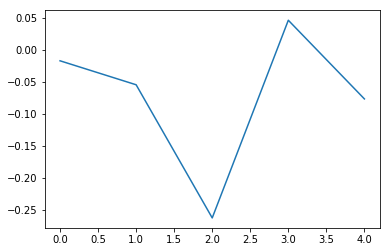

In [295]:
err_backward = []
for i in range(1, steps):
    e1, e2 = next_prd(i, -1)
    err_backward.append(e2)
    print e1, e2
plt.plot(err_backward[:-1])

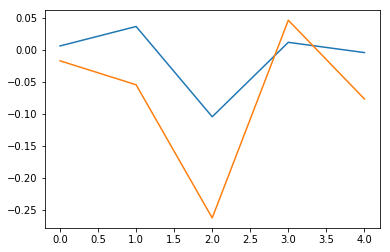

In [296]:
plt.plot(err_forward[:-1])
plt.plot(err_backward[:-1])

In [297]:
print err_forward[:-1]
print err_backward[:-1]

[0.005678799994058181, 0.03602349988119613, -0.10482100005640405, 0.011336599878291054, -0.004667799988197885]
[-0.017488800119281223, -0.05488850005582435, -0.262579000119473, 0.04577340001247876, -0.07695719995351169]


In [376]:
err_forward_new = [err_backward[0]]
err_forward_new.extend(err_forward)
err_backward_new = [err_forward[0]]
err_backward_new.extend(err_backward)

In [380]:
print err_forward_new[:4]
print err_backward_new[:4]

[-0.017488800119281223, 0.005678799994058181, 0.03602349988119613, -0.10482100005640405]
[0.005678799994058181, -0.017488800119281223, -0.05488850005582435, -0.262579000119473]


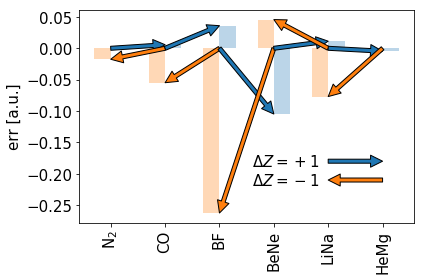

In [389]:
labels = ['', r'N$_2$', 'CO', 'BF', 'BeNe', 'LiNa', 'HeMg']

err_1 = err_forward
err_2 = err_backward

fig, ax = plt.subplots()
ax.bar(np.arange(1, len(err_1))+0.15, err_1[:-1], 0.3, alpha=.3)
ax.bar(np.arange(len(err_2) - 1)-0.15, err_2[:-1], 0.3, alpha=.3)

for i, err in enumerate(err_1[:-1]):
    ax.annotate('', xy=(i+1, err), xytext=(i, 0),
                arrowprops=dict(facecolor='C0'),
                )
    ax.annotate('', xy=(i, err_2[i]), xytext=(i+1, 0),
                arrowprops=dict(facecolor='C1'),
                )

text_y = -.18
text_dy = 0.03
text_shift = .008

ax.annotate('', xy=(5, text_y), xytext=(4, text_y),
            arrowprops=dict(facecolor='C0'),
           )

ax.annotate('', xytext=(5, text_y - text_dy), xy=(4, text_y - text_dy),
            arrowprops=dict(facecolor='C1'),
           )

ax.text(2.6, text_y - text_shift, r'$\Delta Z=+1$', fontsize=15)
ax.text(2.6, text_y - text_dy - text_shift, r'$\Delta Z=-1$', fontsize=15)

ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_xticklabels(labels[:len(err_1)], fontsize=15, rotation='vertical')
    
ax.set_ylabel(r'err [a.u.]', fontsize=15)
plt.tight_layout()
fig.savefig('err.pdf')

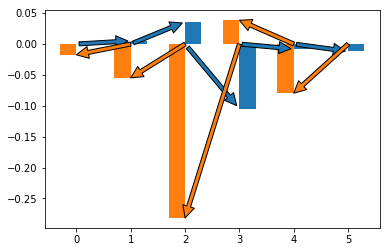

In [246]:
fig, ax = plt.subplots()
ax.bar(np.arange(1, steps - 1)+0.15, err_forward[:-1], 0.3)
ax.bar(np.arange(steps - 2)-0.15, err_backward[:-1], 0.3)

for i, err in enumerate(err_forward[:-1]):
    ax.annotate('', xy=(i+1, err), xytext=(i, 0),
                arrowprops=dict(facecolor='C0', shrink=0.05),
                )
    ax.annotate('', xy=(i, err_backward[i]), xytext=(i+1, 0),
                arrowprops=dict(facecolor='C1'),
                )